# What is the most profitable way to sell cars online?

- Fair price for each model of car
- Saturation in the market
- Average cost per car brand

#vehicle_sold_df.apply(lambda x: x.astype(str).str.lower())

In [201]:
# dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [202]:
vehicle_listing_data = os.path.join("..", "output_data", "vehicles_cleaned.csv")
vehicle_listing_df = pd.read_csv(vehicle_listing_data)

vehicle_sold_data = os.path.join("..", "output_data", "used_cars_sold_cleaned.csv")
vehicle_sold_df = pd.read_csv(vehicle_sold_data)

In [203]:
vehicle_listing_df.head()

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,...,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,0,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,...,clean,automatic,rwd,full-size,truck,black,al,32.592000,-85.51890,2021-05-03T14:02:03-0500
1,1,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,...,clean,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.46820,2021-04-29T17:19:18-0500
2,2,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,...,clean,automatic,fwd,full-size,mini-van,silver,al,32.628739,-85.46182,2021-04-27T12:20:01-0500
3,3,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,...,clean,manual,rwd,full-size,truck,white,al,32.630400,-85.40160,2021-04-26T11:15:36-0500
4,4,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,...,rebuilt,automatic,rwd,mid-size,sedan,grey,al,32.822400,-85.77040,2021-04-24T18:39:59-0500


In [204]:
# Remove values greater than or lower than 3 standard deviation
vehicle_listing_df = vehicle_listing_df[~(np.abs(vehicle_listing_df.price-vehicle_listing_df.price.mean()) > (3*vehicle_listing_df.price.std()))]

In [205]:
# Average price per car type
average_listing_price = vehicle_listing_df[["manufacturer","price"]].groupby(["manufacturer"]).mean().sort_index()

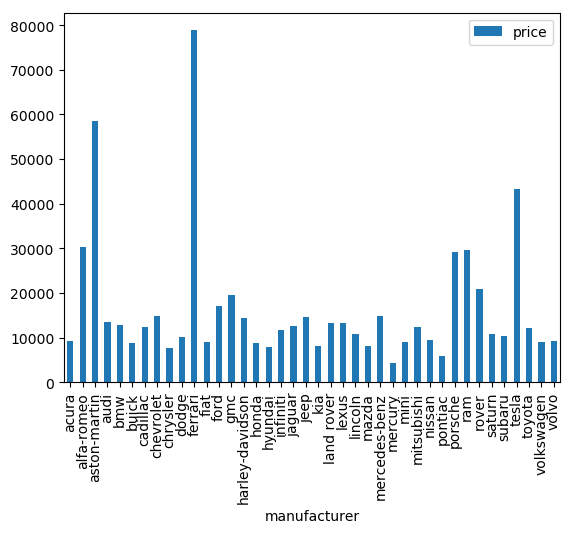

In [206]:
average_listing_price.plot.bar()

In [228]:
# Calculating the number of cars listed
num_cars = vehicle_listing_df[["manufacturer", "Unnamed: 0"]].groupby("manufacturer").count()
num_cars.rename(columns={"Unnamed: 0":"count"})

,count
manufacturer,
acura,688
alfa-romeo,17
aston-martin,4
audi,916
bmw,2064
buick,873
cadillac,1025
chevrolet,10370
chrysler,1270


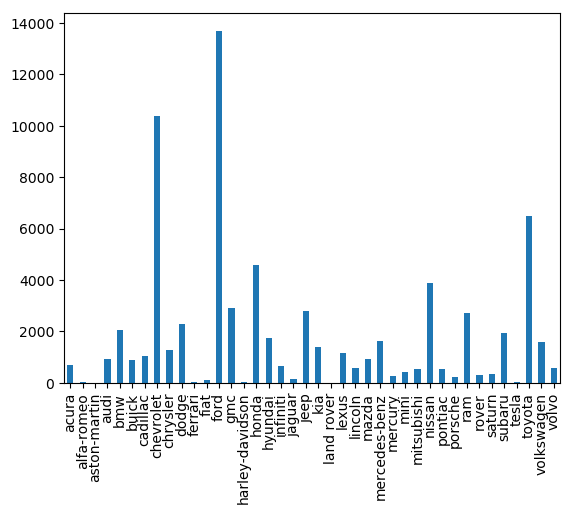

In [208]:
pd.DataFrame(num_cars).reset_index()
num_cars.plot.bar()

In [230]:
average_listing_price.merge("num_cars")

TypeError: Can only merge Series or DataFrame objects, a <class 'str'> was passed